<a href="https://colab.research.google.com/github/Tanish-04/Computer-Vision-Projects/blob/master/NeuralNetworkFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

### What is Derivative

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

def f2(x):
  return 4

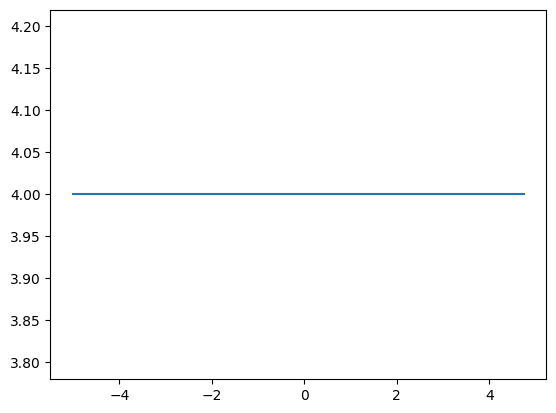

In [3]:
xs = np.arange(-5, 5, 0.25)
plt.plot(xs, [f2(i) for i in xs])

In [4]:
# slope f => 6x - 4
h = 0.0001
x = 8
(f2(x + h) - f2(x)) / h

0.0

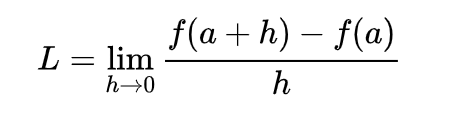

 - Training: Gradient Descent
1.   Forward Pass
2.   Backward Pass
3.   Updating



### Defining the Value class

In [5]:
class Value:
  def __init__(self, data, children=(), op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda : None
    self.prev = set(children)
    self.op = op
    self.label = label

  def __repr__(self):
    return f'Value(data={self.data})'

  def __add__(self, other):
    if not isinstance(other, Value):
      other = Value(other)
    out = Value(self.data + other.data, (self,other), '+')
    def backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = backward
    return out

  def __radd__(self, other):
    return self + other

  def __mul__(self, other):
    if not isinstance(other, Value):
      other = Value(other)
    out = Value(self.data * other.data, (self,other), '*')
    def backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = backward
    return out

  def __rmul__(self, other):
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def backward():
      self.grad = (1 - out.data ** 2) * out.grad
    out._backward = backward
    return out

  def backward(self):
    topo = []
    vis = set()
    def make_topo(node):
      vis.add(node)
      for v in node.prev:
        if v not in vis:
          make_topo(v)
      topo.append(node)

    make_topo(self)
    self.grad = 1.0
    for v in reversed(topo):
      v._backward()



In [6]:
a = Value(3)
b = Value(5)


a + b # backend call a.__add__(b)
a * b # a.__mul__(b)

a + 3 # if not isinstance code added to cover this edge case

3 + a # 3.__add__(a) 3 is not the instance of Value so another builtin function is radd

3 * a # rmul case

Value(data=6)

Implementing the above code in the example below

In [7]:
a = Value(2.0, label='a')
b = Value(3, label='b')
c = a * b; c.label = 'c'
e = Value(4.2, label='e')
d = e + c; d.label = 'd'
f = Value(1.5, label='f')
g = d * f; g.label = 'g'

Ploting for tracking the changes

In [8]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n.op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.op, label = n.op)
      # and connect this node to it
      dot.edge(uid + n.op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.op)

  return dot

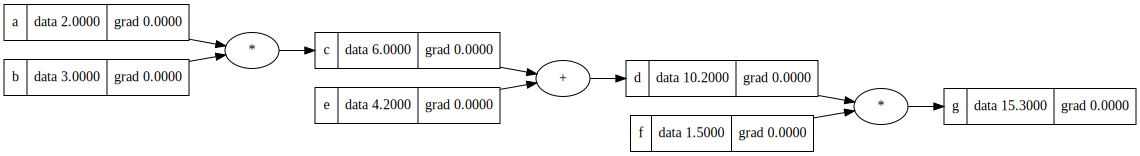

In [9]:
draw_dot(g)

In [11]:
# g = f * d
# dg / df = ?
# dg/df = d * df/df
# dg/df = d
# g.grad = 1
# f.grad = d.data
# d.grad = f.data

ye azib ka h neche se

In [10]:
# inputs
x1 = Value(1.4, label='x1')
x2 = Value(1.3, label='x2')

# weights
w1 = Value(-1.23, label='w1')
w2 = Value(1.54, label='w2')

# bias
b = Value(1.324, label='b')

xw_1 = x1*w1; xw_1.label = 'xw_1'
xw_2 = x2*w2; xw_2.label = 'xw_2'

x = xw_1 + xw_2; x.label = 'xw_1 + xw_2'
y = x + b; y.label = 'y'
o = y.tanh(); o.label = 'o'

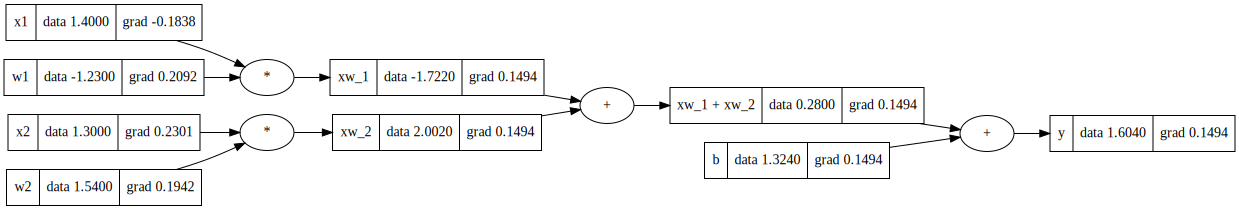

In [13]:
draw_dot(y)

In [12]:
o.backward()

In [ ]:
o.backward()

done here
done here


Implementing above neuron using PyTorch

In [14]:
import torch

In [15]:
x1 = torch.Tensor([1.4]).double(); x1.requires_grad=True
x2 = torch.Tensor([1.3]).double(); x2.requires_grad=True
w1 = torch.Tensor([-1.23]).double(); w1.requires_grad=True
w2 = torch.Tensor([1.54]).double(); w2.requires_grad=True
b = torch.Tensor([1.324]).double(); b.requires_grad=True

y = x1*w1 + x2*w2 + b
y = torch.tanh(y)
print('y', y.item())
y.backward()

print('x1', x1.grad.item())
print('x2', x2.grad.item())
print('w1', w1.grad.item())
print('w2', w2.grad.item())

y 0.9222684300504588
x1 -0.1837877626566606
x2 0.23010824641572689
w1 0.20918931654269393
w2 0.19424721868699485


We can the values in the pytorch code and in the above diagrams are same. That means we have implemented it correctly.


### Building a Neural Network

In [16]:
class Neuron:
  def __init__(self, n):
    self.w = [Value(np.random.uniform(-1, 1)) for _ in range(n)]
    self.b = Value(np.random.uniform(-1, 1))

  def __call__(self, x):
    # w * x + b
    act = sum((xi * wi for xi, wi in zip(x, self.w)), self.b)
    act = act.tanh()
    return act

  def parameters(self):
    return self.w + [self.b]

class Layer:
  def __init__(self, x, y):
    self.neurons = [Neuron(x) for _ in range(y)]

  def __call__(self, x):
    out = [n(x) for n in self.neurons]
    return out

  def parameters(self):
    params = []
    for neuron in self.neurons:
      ps = neuron.parameters()
      params.extend(ps)
    return params



In [19]:
x1 = [1.2, 3.4, 1.43]
l1 = Layer(3, 4)
l2 = Layer(4, 4)
l3 = Layer(4, 1)
z = l1(x1)
print(z)
z1 = l2(z)
print(z1)
o = l3(z1)
o

[Value(data=0.9997136043360499), Value(data=0.9999998195728869), Value(data=0.9954637880824422), Value(data=0.9997558078428967)]
[Value(data=0.9796241720014319), Value(data=0.9713242859718338), Value(data=-0.951918050818397), Value(data=0.8566346302695871)]


[Value(data=-0.9765351950171238)]

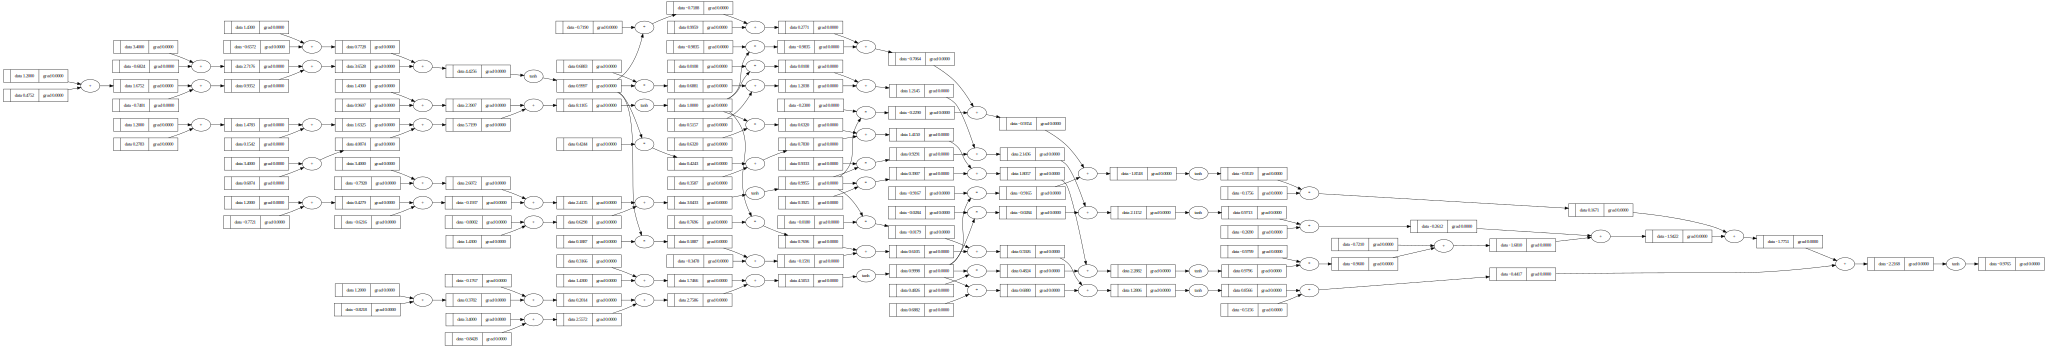

In [23]:
draw_dot(o[0])